1. central tendency

- mean
- median 
- mode

2. variation 

- Range
- Quartiles and Percentiles
- IQR
- SD & SV

3. Tables
 
- Graphs and Charts

4. Probability

- Conditional Probability
- Probability Distribution


In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('class notes/train.csv')

In [11]:
pd.set_option("display.max_columns",10)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,...,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,...,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,...,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,...,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,...,12,2008,WD,Normal,250000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df.SalePrice.head(20)

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

In [16]:
df.SalePrice.min(), df.SalePrice.max()

(34900, 755000)

# Descriptive Statistics

Our target column in SalePrice

## Measure of Central Tendency

In [27]:
mean = df.SalePrice.mean()
round(mean,4)

180921.1959

In [21]:
type(df['SalePrice'])

pandas.core.series.Series

In [22]:
type(df[['SalePrice']])

pandas.core.frame.DataFrame

In [23]:
median = df.SalePrice.median()
median

163000.0

central peak or central point of a normal distribution is where mean=median=mode

In [28]:
mode = df.SalePrice.mode()
mode

0    140000
Name: SalePrice, dtype: int64

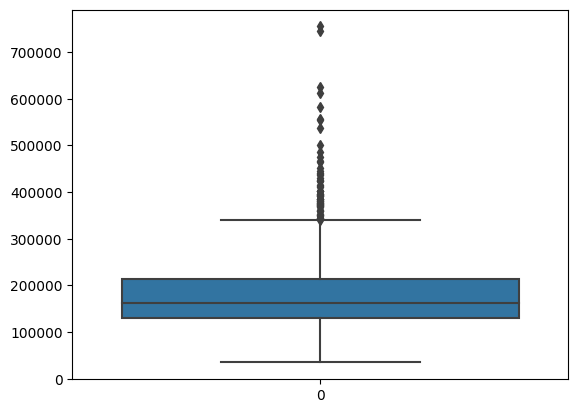

In [37]:
sns.boxplot(data = df.SalePrice)
plt.show()

In [36]:
# lower quartile or q1 can be deduced as
q1 = df.SalePrice.quantile(0.25)

q3 = df.SalePrice.quantile(0.75)

IQR = q3-q1
print(f"The value of Q1 is {q1} and Q3 is {q3} and the IQR is {IQR}")

The value of Q1 is 129975.0 and Q3 is 214000.0 and the IQR is 84025.0


Upper Bound = Q3 + (1.5 * IQR) \
Lower Bound = Q1 - (1.5 * IQR)

In [38]:
UB = q3 + (1.5*IQR)
LB = q1 - (1.5*IQR)

In [42]:
len(df[df['SalePrice']>UB])

61

In [44]:
len(df[df['SalePrice']<LB])

0

In [45]:
LB, df.SalePrice.min()

(3937.5, 34900)

### Skewness

/tmp/ipykernel_41739/4280175316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)


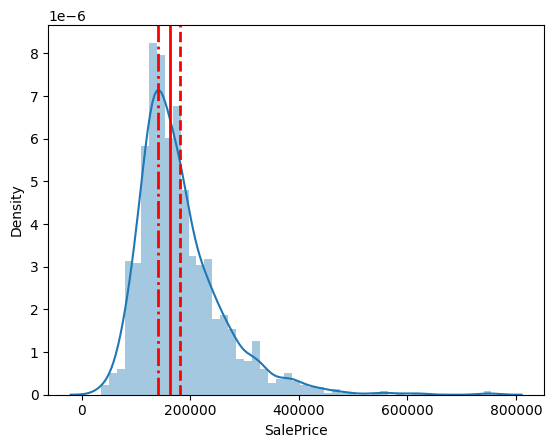

In [56]:
sns.distplot(df.SalePrice)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='red', linestyle='solid', linewidth=2, label='Median')
plt.axvline(mode[0], color='red', linestyle='dashdot', linewidth=2, label='Mode')
plt.show()

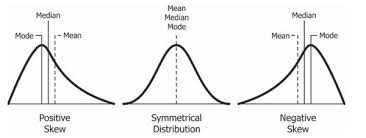
Therefore, the data is positively skewed

In [57]:
mode[0], median, mean

(140000, 163000.0, 180921.19589041095)

In [59]:
df.SalePrice.value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

## Spread of The Data

In [61]:
Min = df.SalePrice.min()
Max = df.SalePrice.max()
Range = Max - Min
Range

720100

## standard variance and deviation

In [62]:
standard_deviation = df.SalePrice.std()
standard_variance = df.SalePrice.var()
standard_deviation, standard_deviation**2, standard_variance

(79442.50288288662, 6311111264.297449, 6311111264.297448)

In [66]:
df.corr()

/tmp/ipykernel_41739/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,...,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,...,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,...,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,...,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,...,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,...,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,...,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,...,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,...,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,...,0.140491,0.003571,-0.015727,0.014359,0.386420


The above is correlation matrix

In [67]:
df[['SalePrice','GrLivArea']].corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


In [68]:
np.corrcoef(df.SalePrice, df.GrLivArea)

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

|\>0.5| correlation coefficient then it is strongly correlated

In [69]:
df[['SalePrice','GarageCars','GarageArea','TotalBsmtSF','LotArea','1stFlrSF']].corr()

,SalePrice,GarageCars,GarageArea,TotalBsmtSF,LotArea,1stFlrSF
SalePrice,1.000000,0.640409,0.623431,0.613581,0.263843,0.605852
GarageCars,0.640409,1.000000,0.882475,0.434585,0.154871,0.439317
GarageArea,0.623431,0.882475,1.000000,0.486665,0.180403,0.489782
TotalBsmtSF,0.613581,0.434585,0.486665,1.000000,0.260833,0.819530
LotArea,0.263843,0.154871,0.180403,0.260833,1.000000,0.299475
1stFlrSF,0.605852,0.439317,0.489782,0.819530,0.299475,1.000000


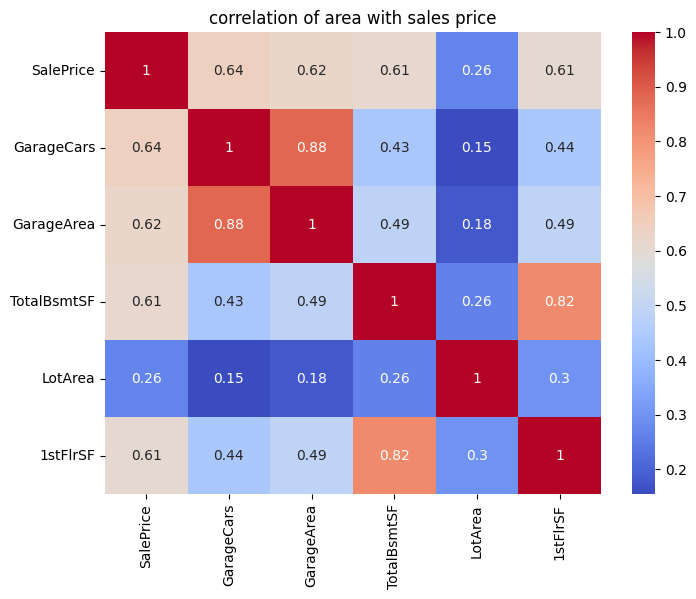

In [71]:
# Visualise the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[['SalePrice','GarageCars','GarageArea','TotalBsmtSF','LotArea','1stFlrSF']].corr(), annot = True, cmap = 'coolwarm')
plt.title("correlation of area with sales price")
plt.show()

## Probability

In [72]:
df_kerala = pd.read_csv('class notes/kerala.csv')

In [73]:
df_kerala.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,...,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,...,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,...,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,...,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,...,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,...,383.5,74.4,0.2,2741.6,NO


In [74]:
df_kerala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [76]:
df_kerala['FLOODS'] = df_kerala['FLOODS'].map({'YES':1,'NO':0})

In [78]:
df_kerala['FLOODS'].head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

In [81]:
df_kerala['june_gt_500'] = (df_kerala['JUN']>500).astype('int64')
df_kerala['july_gt_500'] = (df_kerala['JUL']>500).astype('int64')
df_kerala.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,...,DEC,ANNUAL RAINFALL,FLOODS,june_gt_500,july_gt_500
0,KERALA,1901,28.7,44.7,51.6,...,48.4,3248.6,1,1,1
1,KERALA,1902,6.7,2.6,57.3,...,121.5,3326.6,1,0,1
2,KERALA,1903,3.2,18.6,3.1,...,59.0,3271.2,1,1,1
3,KERALA,1904,23.7,3.0,32.2,...,3.3,3129.7,1,1,1
4,KERALA,1905,1.2,22.3,9.4,...,0.2,2741.6,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
103,KERALA,2004,2.4,8.1,37.9,...,2.7,2886.1,0,1,0
104,KERALA,2005,19.8,7.0,25.3,...,56.4,3031.1,1,1,1
105,KERALA,2006,8.1,0.5,90.7,...,1.8,3420.6,1,0,1
106,KERALA,2007,0.5,5.6,7.3,...,11.9,3489.6,1,1,1


In [82]:
dfk = df_kerala.loc[:,['YEAR','JUN','june_gt_500','JUL','july_gt_500','FLOODS']]
dfk.head()

,YEAR,JUN,june_gt_500,JUL,july_gt_500,FLOODS
0,1901,824.6,1,743.0,1,1
1,1902,390.9,0,1205.0,1,1
2,1903,558.6,1,1022.5,1,1
3,1904,1098.2,1,725.5,1,1
4,1905,850.2,1,520.5,1,0


In [83]:
dfk.shape

(118, 6)

In [84]:
pd.crosstab(dfk['FLOODS'], dfk['june_gt_500'])

june_gt_500,0,1
FLOODS,,
0,19,39
1,6,54


Defining some variables:

P(F): Probability of flooding \
P(J): Probability of having more than 500 mm rain in June \
P(F ∩ J): Probability of flooding and having more than 500 mm rain in June \
P(F|J): Probability of flooding given it rained more than 500 mm in June \
Based on the above table we can easily find these probabilities.

In [89]:
p_f = (54+6)/118
p_j = (39+54)/118
p_f_intersection_j = 54/118
p_f_given_j = p_f_intersection_j/p_j
p_f, p_j, p_f_intersection_j, p_f_given_j

(0.5084745762711864, 0.788135593220339, 0.4576271186440678, 0.5806451612903226)